# Unit 2. A gentle introduction to audio applications

## Audio classification with a pipeline

In [2]:
!pip install datasets[audio]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 8.3 MB/s eta 0:00:00


In [3]:
# Load the dataset, and resample
from datasets import load_dataset
from datasets import Audio

minds = load_dataset("PolyAI/minds14", name="en-AU", split="train")
minds = minds.cast_column("audio", Audio(sampling_rate=16_000))

Generating train split: 0 examples [00:00, ? examples/s]

In [5]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.9 MB/s eta 0:00:00


In [6]:
# Classify audio recording into a set of classes using transformers pipeline
# using a fine-tuned model
from transformers import pipeline

classifier = pipeline(
    "audio-classification",
    model="anton-l/xtreme_s_xlsr_300m_minds14",
)

In [7]:
# Select an example
example = minds[0]

# Pass it to the classifier
classifier(example["audio"]["array"])

[{'score': 0.962530791759491, 'label': 'pay_bill'},
 {'score': 0.028672993183135986, 'label': 'freeze'},
 {'score': 0.0033498124685138464, 'label': 'card_issues'},
 {'score': 0.0020058127120137215, 'label': 'abroad'},
 {'score': 0.0008484353311359882, 'label': 'high_value_payment'}]

In [8]:
# Check versus the actual label
id2label = minds.features["intent_class"].int2str
id2label(example["intent_class"])

'pay_bill'

## Automatic Speech Recognition (ASR) with a pipeline

In [9]:
# Instantiate the pipeline
from transformers import pipeline

asr = pipeline("automatic-speech-recognition")

No model was supplied, defaulted to facebook/wav2vec2-base-960h and revision 55bb623 (https://huggingface.co/facebook/wav2vec2-base-960h).
Using a pipeline without specifying a model name and revision in production is not recommended.


Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [10]:
# Pass an example to the pipeline
example = minds[0]
asr(example["audio"]["array"])

{'text': 'I WOULD LIKE TO PAY MY ELECTRICITY BILL USING MY CAD CAN YOU PLEASE ASSIST'}

In [11]:
# Compare with ground truth
example["english_transcription"]

'I would like to pay my electricity bill using my card can you please assist'

In [12]:
# Load the German subset
from datasets import load_dataset
from datasets import Audio

minds = load_dataset("PolyAI/minds14", name="de-DE", split="train")
minds = minds.cast_column("audio", Audio(sampling_rate=16_000))

Generating train split: 0 examples [00:00, ? examples/s]

In [13]:
# Get an example and its transcription
example = minds[0]
example["transcription"]

'ich möchte gerne Geld auf mein Konto einzahlen'

In [14]:
# Use a pre-trained ASR and transcribe the example
from transformers import pipeline

asr = pipeline("automatic-speech-recognition",
               model="maxidl/wav2vec2-large-xlsr-german")
asr(example["audio"]["array"])

/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:380: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'text': 'ich möchte gerne geld auf mein konto einzallen'}

## Hands-on exercise

In [15]:
# Load the Voxpopuli dataset in French
from datasets import load_dataset

voxpopuli_french = load_dataset("facebook/voxpopuli", "fr",
                                split="train",
                                streaming=True)

In [16]:
# Extract first 3 elements
voxpopuli_french_head = voxpopuli_french.take(3)
list(voxpopuli_french_head)

[{'audio_id': '20200212-0900-PLENARY-fr_20200212-18:11:25_1',
  'language': 2,
  'audio': {'path': 'train_part_0/20200212-0900-PLENARY-fr_20200212-18:11:25_1.wav',
   'array': array([ 3.66210938e-04, -9.15527344e-05, -2.74658203e-04, ...,
          -6.40869141e-04, -7.93457031e-04, -9.15527344e-04]),
   'sampling_rate': 16000},
  'raw_text': 'Notre délégation défendra la lutte contre les écarts salariaux à travail égal, contre les cyberviolences, les mariages forcés et les mutilations génitales.',
  'normalized_text': 'notre délégation défendra la lutte contre les écarts salariaux à travail égal contre les cyberviolences les mariages forcés et les mutilations génitales.',
  'gender': 'female',
  'speaker_id': '182995',
  'is_gold_transcript': True,
  'accent': 'None'},
 {'audio_id': '20170704-0900-PLENARY-20-fr_20170704-20:53:03_11',
  'language': 2,
  'audio': {'path': 'train_part_0/20170704-0900-PLENARY-20-fr_20170704-20:53:03_11.wav',
   'array': array([ 6.10351562e-05, -2.13623047e

In [17]:
# Then select the third element (starts at 0)
import itertools

example = next(itertools.islice(voxpopuli_french_head, 2, None))
example

{'audio_id': '20101124-0900-PLENARY-93-fr_20101124-22:03:52_2',
 'language': 2,
 'audio': {'path': 'train_part_0/20101124-0900-PLENARY-93-fr_20101124-22:03:52_2.wav',
  'array': array([-0.00088501, -0.00619507, -0.00302124, ..., -0.00537109,
          0.00131226,  0.00106812]),
  'sampling_rate': 16000},
 'raw_text': 'Cette régulation concerne les États et leurs économies, mais évidemment, les principaux acteurs économiques sont les entreprises et, en particulier, les entreprises multinationales, qui sont les principales actrices du commerce mondial.',
 'normalized_text': 'cette régulation concerne les états et leurs économies mais évidemment les principaux acteurs économiques sont les entreprises et en particulier les entreprises multinationales qui sont les principales actrices du commerce mondial.',
 'gender': 'male',
 'speaker_id': '4318',
 'is_gold_transcript': True,
 'accent': 'None'}

In [20]:
!pip install librosa

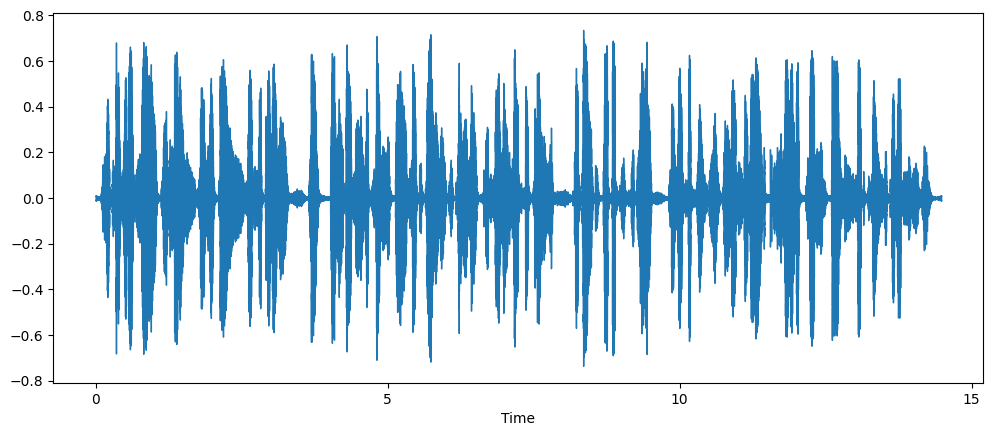

In [21]:
# Plot waveform
import librosa
import matplotlib.pyplot as plt

plt.figure().set_figwidth(12)
librosa.display.waveshow(example["audio"]["array"],
                         sr=example["audio"]["sampling_rate"])
plt.show()

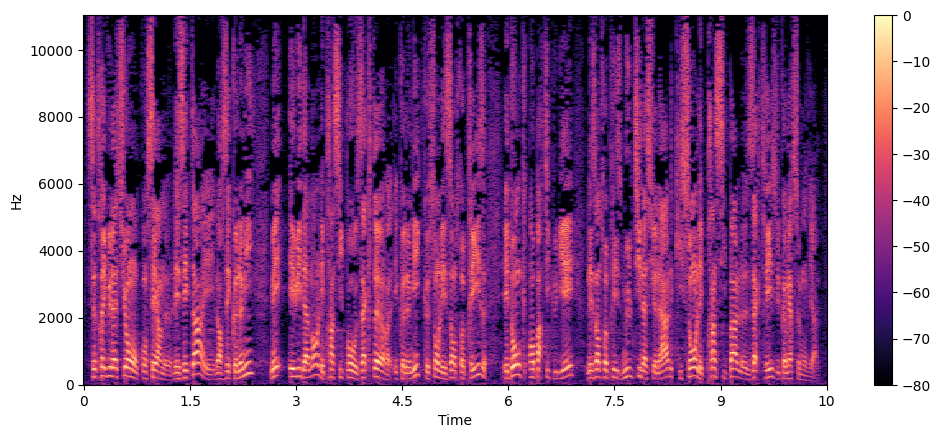

In [23]:
# Plot spectrogram
import numpy as np

D = librosa.stft(example["audio"]["array"])
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()
plt.show()

In [24]:
# Use a pre-trained ASR and transcribe the example
from transformers import pipeline

asr = pipeline("automatic-speech-recognition",
               model="facebook/wav2vec2-large-xlsr-53-french")
asr(example["audio"]["array"])

{'text': 'cette régulation concerne les tats et leurs économies mais évidemment les principaux acteurs économiques que sont les entreprises est donc en particulier les entreprises multinationales qui sont les principales actrices du commerce mondial'}

In [25]:
# Compare with ground truth
example["normalized_text"]

'cette régulation concerne les états et leurs économies mais évidemment les principaux acteurs économiques sont les entreprises et en particulier les entreprises multinationales qui sont les principales actrices du commerce mondial.'